## Leitura e escritura de dados

Em Python há varios caminhos para ler e escrever dados.  A biblioteca `numpy` provee várias formas.

### `np.savetxt`

No exemplo seguinte definimos uma matriz e a salvamos como arquivo de texto. 

In [55]:
import numpy as np
x = np.array([[1, 2, 3], 
              [4, 5, 6],
              [7, 8, 9]], np.int32)
np.savetxt("teste.txt", x)

Quando imprimimos ou abrimos o arquivo encontramos o seguinte

<img src="Figs/savetxt1.png" width=100% >

É possível também guardar o arquivo com um formato especial, exemplo, número de casas decimais ou como inteiros. Para isso definimos um formato como terceiro parametro no comando `savetxt`.   

Podemos mudar também o delimitador, isto é, o espaço entre um dado e outro. O delimitador padrão são casas em branco.  Podemos escolher o delimitador desejado usando o quarto parâmetro da função, `delimiter` que é um string. 


In [3]:
np.savetxt("test2.txt", x, fmt="%2.3f", delimiter=",")
np.savetxt("test3.txt", x, fmt="%04d", delimiter=" :-) ")

Esses arquivos se veem assim:

<img src="Figs/savetxt2.png" width=100% >


A sintaxe completa de `savetxt` é

In [8]:
np.savetxt('nome_arquivo.txt', x, fmt='%.18e', delimiter=' ', \
           newline='\n', header='', footer='', comments='# ')

Onde os parâmetros são:

* newline: é um string (e.g. "\n", "\r\n" or ",\n")
* header: um strign que será escrito no cabeçalho do arquivo
* footer: um string que será escrito no fim do arquivo
* comments: um string que será adicionado a header ou footer para sinalizar que são comentários.  O jogo da abelha é o padrão.

Se quisermos ir adicionando linhas a um arquivo. Algo feito comunmente em programas científicos onde as variáveis evoluem no espaço ou no tempo no interior de loops for ou while, o mesmo comando ira colocando os novos valores no final do arquivo. Porém para isso funcionar, temos inicialmente  que abrir o arquivo como se fosse um documento binario, e depois de escrever, fechamos ele. 


In [29]:
# para abrir o arquivo
f=open('adlinhas.txt','ab')

for iind in range(4):
    # esse comando gera um array 2x2 de numeros randomicos
    a=np.random.rand(2,2)
    # agora escrevemos
    np.savetxt(f,a)
f.close()

# note que se executamos esses comandos repetidas vezes
# iremos adicionar mais e mais linhas ao arquivo

### lendo arquivos com `np.loadtxt`

É o comando equivalente para leitura de arquivos. Vamos ler o arquivo que criamos acima

In [10]:
y = np.loadtxt('teste.txt')

In [11]:
y

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

É possivel colocar cada array dentro de 'teste.txt' num array diferente

In [12]:
x,y,z = np.loadtxt('teste.txt')

In [13]:
x

array([1., 2., 3.])

In [14]:
y

array([4., 5., 6.])

In [15]:
z

array([7., 8., 9.])

### Lendo e escrevendo com `np.load` e `np.save`

Quando os arquivos que queremos escrever vão ser lidos dentro do proprio python, o método recomendado é `np.load` e `np.save`.  O ultimo salva o arquivo em formato binario do python. Como é um binario, ele economiza espaço, porém não pode ser visualizado desde a terminal. O arquivo salvo terá a extensão `.npy`.

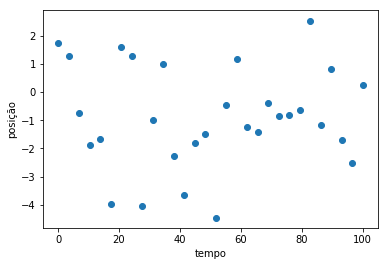

In [38]:
import matplotlib.pylab as plt
%matplotlib inline

# criamos dos arrays
tempo = np.linspace(0,100,30)
posicao = np.random.normal(0,2,30)

plt.scatter(tempo,posicao)
plt.xlabel('tempo')
plt.ylabel('posição')

# salvamos os dados com np.save
np.save('temp_vs_pos', ((tempo,posicao)))

Recuperamos os dados no arquivo *temp_vs_pos.dat* usando `np.load`

In [39]:
tempo, posicao = np.load('temp_vs_pos.npy')

Text(0, 0.5, 'posição')

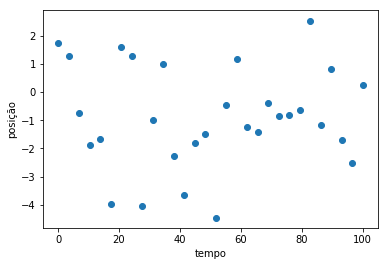

In [40]:
plt.scatter(tempo,posicao)
plt.xlabel('tempo')
plt.ylabel('posição')

### `Pandas` a biblioteca para analise de dados

Pandas é um pacote de Python que prove rotinas rápidas e expresivas para trabalhar com estruturas de dados. O objetivo de Pandas é ser a ferramenta  open-source mais poderosa e flexivel para analises de dados. Nos focaremos por enquanto na versatilidade para leitura de arquivos CSV (comma separated values).

Um bom exemplo é a tabela de alunos oferecida pelo sistema minha ufmg. 


In [41]:
import pandas as pd

In [50]:
# a variavel names é uma lista de strings onde podemos
# colocar nome a cada uma das colunas do arquivo

al = pd.read_csv('alumni/20182_DIG.csv',header=2, \
                     names=['index','matricula','nomes'])

In [53]:
al.head()

,index,matricula,nomes
0,1,2012027240,ALINE ANDRADE DO NASCIMENTO
1,2,2015105608,ANA CLARA MAGALHAES BARCELOS
2,3,2018050839,BARBARA ALVES LAND FERREIRA
3,4,2017019261,BEATRIZ DE SOUZA PANCRACIO DE ERRICO
4,5,2018050995,CAYRO TEIXEIRA DE SIQUEIRA NETO


In [54]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
index        41 non-null int64
matricula    41 non-null int64
nomes        41 non-null object
dtypes: int64(2), object(1)
memory usage: 1.0+ KB


Com o mesmo comando podemos ler arquivos `.txt` 

## Atividade
### Mudanças da temperatura da terra

A média da temperatura na terra é $T = 14$ C. Essa temperatura tem mudado muito ao longo da historia da terra ($4.6$ bilhoes de anos), tal como se ve na figura seguinte que reconstrui a partir de abundancias de isotopos anomalia a temperatura terrestre. (Quanto mais distante no passado é feita uma medição mais imprecisa ela fica.)

*A palavra anomalia se refere a variações com respeito a uma média calculada sob algum período*. 

Uma descrição de cada um dos segmentos da figura pode ser encontrada no seguinte link:

[Paleotemperaturas](https://en.wikipedia.org/wiki/File:All_palaeotemps.png#Summary)

<img src="Figs/All_palaeotemps.svg.png" width=100% >

É interessante a variação quase-periódica do painel 4 da figura acima que mostra os chamados ciclos glaciais-interglaciais.  As mudanças de temperatura durante esses ciclos levaram à expansão (períodos glaciares) e contração (períodos interglaciares) das camadas de gelo que cobrem a terra. A partir de então, a terra permanece num período interglacial chamado Holoceno.  A existência desses ciclos se deve à mudanças cíclicas do percurso da terra arredor do sol. Mudanças na eccentricidade, inclinação do eixo de rotação e preseção do eixo de rotação contribuim aos trés ciclos dominantes chamados *ciclos de Milankovitch*.  A variação desses três ciclos altera o fluxo de radiação solar que chega na terra, impactando fortemente no clima. 

* Eccentricidade: ciclo de ~ $100.000$ anos
* Inclinação do eixo de rotação em relação ao plano da orbita arredor do sol: ciclo de $41.000$ anos
* Precesão: é um suave balanço do eixo de rotação: ciclo de $23.000$ anos. 

<img src="Figs/milankovitch.jpg" width=100% >

O quarto painel da figura acima pode ser reconstruida a partir dos dados localizados na pasta *data*, no arquivo *edc3deuttemp2007.txt*. Fonte: [nooa](https://www.ncdc.noaa.gov/data-access/paleoclimatology-data/datasets/ice-core).

<img src="Figs/paleo_tanomaly.png" width=80%>

### Aquecimento global

É possível também reconstruir a temperatura dos últimos 2000 anos usando medidas indiretas como a espessura dos aneis das árvores, crescimento dos corais, mudanças na concentração de isotopos, etc. A anomalia é apresentada na seguinte figura.    

<img src="Figs/2000_Year_Temperature.png" width=80%>

Observamos nessa figura 3 caracteristicas importantes:

1. A média global de temperatura nos últimos 25 anos tem sido maior que em qualquer período desde 1600 AD
2. Existiu uma pequena idade do gelo por volta 1700 AD
3. Existiu um período cálido medieval (MWP) centrado em 1000 AD. 

Medidas sistemáticas da temperatura começaram no fim do século XVIII. 
O arquivo localizado na pasta *data*, chamado *Complete_TAVG_complete.txt* contém os dados para reconstruir a temperatura a partir de 1750. Fonte: [berkeley earth project](http://berkeleyearth.org/).

<img src="Figs/tanomaly1750.png" width=80%>

#### Atividade: 

Descargue as duas tabelas de dados no repositorio. Para a tabela de paleo-temperaturas estime a inclinação da curva para o máximo que começa em $-16.000$ anos e estime a taxa de crescimento da temperatura como função do tempo.

Faça o mesmo para a tabela de dados com medidas diretas de temperatura estimando a mesma taxa para temperaturas a partir de 1850, e começando a partir de 1950.

Discuta criticamente seus resultados em relação ao aquecimento global antropogénico. 